**Laboratorio 1 -- Minería de datos**
**by Julia Patrycja Wojciachorseman**

**Cargar los datos**

In [1]:
#Aquí estoy imprimiendo los nombres de los archivos que se encuentran en la carpeta del path indicado en la variable mnist_path
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from os.path import isfile, join
import  os
mnist_path = 'C:/datasets/'

for dirname, _, filenames in os.walk(mnist_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/datasets/t10k-images-idx3-ubyte.gz
C:/datasets/t10k-labels-idx1-ubyte.gz
C:/datasets/train-images-idx3-ubyte.gz
C:/datasets/train-labels-idx1-ubyte.gz


In [2]:
#Los datos se guardan en variables
#Tanto los datos de entrenamiento como de test vienen separados por las etiquetas y atributos
import gzip
import pandas as pd

#Varaibles con los atributos
train_set_images = gzip.open("C:/datasets/train-images-idx3-ubyte.gz", "rb")
test_set_images = gzip.open("C:/datasets/t10k-images-idx3-ubyte.gz", "rb")
#Varaibles con las etiquetas
train_set_labels = gzip.open("C:/datasets/train-labels-idx1-ubyte.gz", "rb")
test_set_labels = gzip.open("C:/datasets/t10k-labels-idx1-ubyte.gz", "rb")

**Formateo de los datos**

In [3]:
#Debido al formato gz es necesario procesar los datos para poder crear dataframes
#Los métodos obtenidos con la ayuda de directorio de github https://github.com/JACantoral/DL_fundamentals/blob/main/get_images.py

#Este método sirve para obtener los atributos de las instancias
def read_images(data):

#En la página de mnist se menciona que los primeros bytes (0000) se encuentran los números mágicos
#Como no nos interesan,los deshechamos
    _ = int.from_bytes(data.read(4), 'big')
#En los siguiente 4 bytes (0004) se encuentra el número que indica la cantidad de instancias
    num_images = int.from_bytes(data.read(4), 'big')
#En los siguientes 4 bytes (0008) se encuentra el número que indica el número de filas que contiene una imagen de un número
    rows = int.from_bytes(data.read(4), 'big')
#En los siguientes 4 bytes (0012) se encuentra el número que indica el número de columnas que contiene una imagen de un número
    cols = int.from_bytes(data.read(4), 'big')
#En los bytes restantes, se encuentran los datos de las imágenes de los números
    train_images = data.read()
#Pasamos los datos a formato utf8
    x_images = np.frombuffer(train_images, dtype=np.uint8)
#Hasta ahora los atributos de las instancias no estaban separadas por instancias
#Lo que hacemos en las siguientes líneas es separar dichos atributos por instancias y los formateamos para conseguir un DataFrame
    x_images = x_images.reshape((num_images, rows*cols))
    x_images = pd.DataFrame(x_images)
    return x_images

In [4]:
#Este método sirve para obtener las etiquetas de las instancias
def read_labels(data):

#En los primeros 4 bytes se encuentran las etiquetas de los números mágicos que hemos desechado y en los siguientes 4, el número de etiquetas que hay en el archivo
#En el resto de los bytes están las etiquetas, y como es lo único que nos interesa, nos quedamos con los datos a partir del 8 byte
    labels = data.read()[8:]
#Al igual que en el método anterior formateamos los datos para poder trabajar con ellos
    y_labels = np.frombuffer(labels, dtype=np.uint8)
    y_labels_a = np.array(y_labels)
    y_labels = pd.DataFrame(y_labels)

    return y_labels, y_labels_a

In [5]:
#Aplicamos los métodos de formateo a los datos y los guardamos en las variables1
#Atributos
x_train = read_images(train_set_images)
x_test = read_images(test_set_images)
#Etiquetas
y_train, y_train_a = read_labels(train_set_labels)
y_test, y_test_a = read_labels(test_set_labels)


In [6]:
#Aquí se puede comprobar que formato tienen tanto las etiquetas como los atributos
x_train.info()
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 784 entries, 0 to 783
dtypes: uint8(784)
memory usage: 44.9 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       60000 non-null  uint8
dtypes: uint8(1)
memory usage: 58.7 KB


**Visualización**

<BarContainer object of 10 artists>

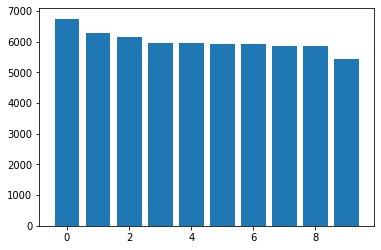

In [7]:
import seaborn as sns
from matplotlib import pyplot as plt

#Representación de los datos mediante un diagrama de barras
index=(0,1,2,3,4,5,6,7,8,9)
plt.bar(index, y_train.value_counts())

In [8]:
#Visualización de cada instancia
def visualize(i):
    some_digit = x_train.iloc[i]
    plt.imshow(some_digit.values.reshape(28, 28))
    print('label', y_train.iloc[i])

label 0    0
Name: 1000, dtype: uint8


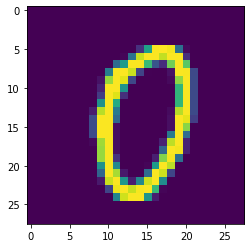

In [9]:
visualize(1000)

label 0    9
Name: 1005, dtype: uint8


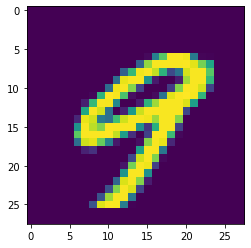

In [10]:
visualize(1005)

**Clustering**

In [11]:
from sklearn.decomposition import PCA

#Antes de aplicar el método de clasificación utilizamos PCA para reducir el número de atributos
print('Dim originally: ',x_train.shape)
#Como vamos a representar gráficamente los clusters, nos quedaremos con los 2 atributos más imporantes
pca = PCA(n_components=2)
pca.fit(x_train)
# Cambio de base a dos dimensiones PCA
x_train_PCAspace = pca.transform(x_train)
print('Dim after PCA: ',x_train_PCAspace.shape)


Dim originally:  (60000, 784)
Dim after PCA:  (60000, 2)


In [12]:
from sklearn.cluster import KMeans
#Con los atributos reducidos, aplicamos el algoritmo Kmeans, en este caso hacemos con 10 clusters
n_clusters=10
kmeans = KMeans(n_clusters)
kmeans.fit(x_train_PCAspace)
#Por cada instancia en x_train obtenemos la etiqueta de cada cluster
kmeansLabels = kmeans.predict(x_train_PCAspace)

In [13]:
from sklearn.manifold import TSNE
tsne = TSNE().fit_transform(x_train_PCAspace)

C:\Python\Python37\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Python\Python37\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


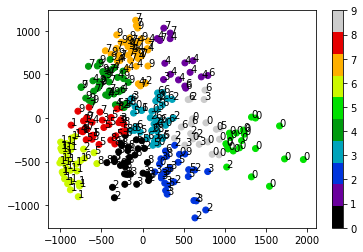

In [14]:
#Representación gráfica de los clusters
import matplotlib.pyplot as plt
#Para obtener una visualización más clara de los cluster representamos 300 muestras
samples = 300

sc = plt.scatter(x_train_PCAspace[:samples,0],x_train_PCAspace[:samples,1], cmap=plt.cm.get_cmap('nipy_spectral', 10),c=kmeansLabels[:samples])
plt.colorbar()

for i in range(samples):
    plt.text(x_train_PCAspace[i,0],x_train_PCAspace[i,1], y_train_a[i])


In [15]:
#Visualización de 4 muestras aleatorias de cada cluster
import random as rd
#Métodos auxiliares para obtener las 4 muestras
def randomIndex(data,muestras):

    i=rd.randint(0, len(data)-4)
    for j in range(0,4):
        muestras.append(data[i])
        i= i + 1
    return muestras

def generarEtiquetas():
    etiquetas=[]
    for i in range(0,10):
        for j in range(0,4):
            etiquetas.append(i)
    return etiquetas

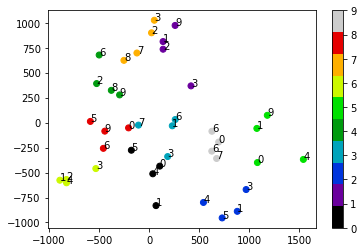

In [49]:
#Otención de un array con 4 muestras aleatorias de cada cluster
#Primero segregamos las muestras por etiquetas
clusters=[None]*10
for i in np.unique(kmeansLabels):
    clusters[i]=x_train_PCAspace[kmeansLabels==i]

#Teniendo ya las instancias separadas, elegimos 4 aleatorias de cada cluster y las guardamos en un array
randomInstances=[]
for i in np.unique(kmeansLabels):
    randomInstances = randomIndex(clusters[i],randomInstances)
randomInstances= np.array(randomInstances)

#Generamos las etiquetas de cada cluster para asignarselas en la representación gráfica
kmeansLabels2 = generarEtiquetas()

samples= 40
sc = plt.scatter(randomInstances[:samples,0],randomInstances[:samples,1], cmap=plt.cm.get_cmap('nipy_spectral', 10),c=np.array(kmeansLabels2))
plt.colorbar()

# Etiqueta numérica: clase
for i in range(samples):
    plt.text(randomInstances[i,0],randomInstances[i,1], y_train_a[i])

**Matriz de confusión**

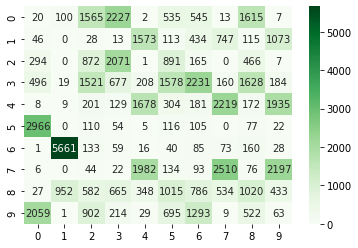

In [66]:
from sklearn.metrics import confusion_matrix

# El atributo generado por K-means es int, hay que pasarlos a string
to_string = lambda x : str(x)
# Obtener matriz de confusión Class to clustering eval
cm = confusion_matrix(np.vectorize(to_string)(kmeansLabels), np.vectorize(to_string)(y_train_a))
# Mapa de calor a partir de la matriz de confusion
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")

In [67]:
def retrieve_info(labels, y_train):
    reference_labels = {}
    for i in range(len(np.unique(kmeans.labels_))):
        index = np.where(labels == i,1,0)
        num = np.bincount(y_train[index==1]).argmax()
        reference_labels[i] = num
    return reference_labels



60000


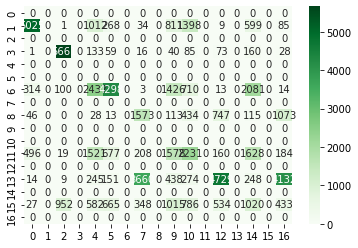

In [77]:
from sklearn.metrics import confusion_matrix
reference_labels = retrieve_info(kmeansLabels,y_train_a)
number_labels = np.random.rand(len(kmeansLabels))
for i in range(len(kmeansLabels)):
    number_labels[i] = reference_labels[kmeansLabels[i]]
# El atributo generado por K-means es int, hay que pasarlos a string
to_string = lambda x : str(x)
# Obtener matriz de confusión Class to clustering eval
cm = confusion_matrix(np.vectorize(to_string)(number_labels), np.vectorize(to_string)(y_train_a))
# Mapa de calor a partir de la matriz de confusion
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")

Cualitativamente parece que correla con la clase y la matriz de confusión también nos da cierta información cuantitativa sobre la correlación. Medir cuantitativamente la correlación de la etiqueta cluster con la clase. ¿Y si en lugar de 10 clusters generamos más se obtiene mayor correlación?
https://www.cienciadedatos.net/documentos/py20-clustering-con-python.html
